# Visualization
Static and interactive visualizations: genre correlation heatmap, t-SNE/PCA embeddings, and the movie similarity network.

In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load pre-built artifacts if available, otherwise train quickly
EMBEDDINGS = ROOT / 'outputs' / 'embeddings'
MODELS     = ROOT / 'outputs' / 'models'
PROCESSED  = ROOT / 'data'    / 'processed'

if (EMBEDDINGS / 'movie_embedding_3d.csv').exists():
    emb3d  = pd.read_csv(EMBEDDINGS / 'movie_embedding_3d.csv')
    movies = pd.read_parquet(PROCESSED / 'movies_enriched.parquet')
    print('Loaded pre-built embeddings:', emb3d.shape)
else:
    print('Artifacts not found. Run: python run_pipeline.py all')

Loaded pre-built embeddings: (200, 8)


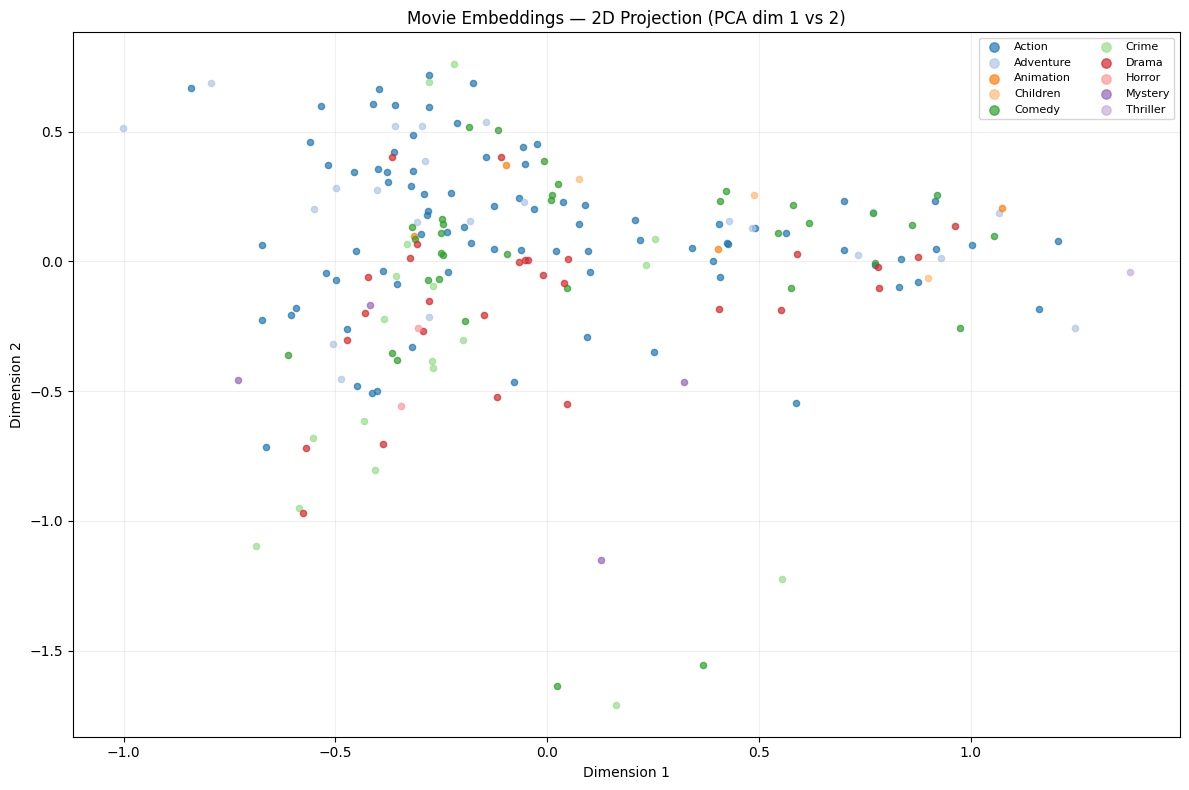

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3D embedding — 2D projection via dim_1 and dim_2
palette = sns.color_palette('tab20', emb3d['primary_genre'].nunique())
genre_list = sorted(emb3d['primary_genre'].dropna().unique())
color_map = {g: palette[i] for i, g in enumerate(genre_list)}

fig, ax = plt.subplots(figsize=(12, 8))
for genre, grp in emb3d.groupby('primary_genre'):
    ax.scatter(grp['dim_1'], grp['dim_2'], label=genre, alpha=0.7, s=20,
               color=color_map.get(genre, 'gray'))

ax.legend(markerscale=1.5, fontsize=8, ncol=2, loc='upper right')
ax.set_title('Movie Embeddings — 2D Projection (PCA dim 1 vs 2)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [8]:
# Interactive 3D scatter with Plotly
import plotly.express as px
from IPython.display import HTML, display

fig = px.scatter_3d(
    emb3d,
    x='dim_1', y='dim_2', z='dim_3',
    color='primary_genre',
    size='rating_count',
    size_max=14,
    hover_data=['title', 'year'],
    opacity=0.8,
    title='Interactive 3D Movie Embedding',
    template='plotly_white',
)

# Render inline without relying on nbformat-based mime renderers
display(HTML(fig.to_html(full_html=False, include_plotlyjs='cdn')))

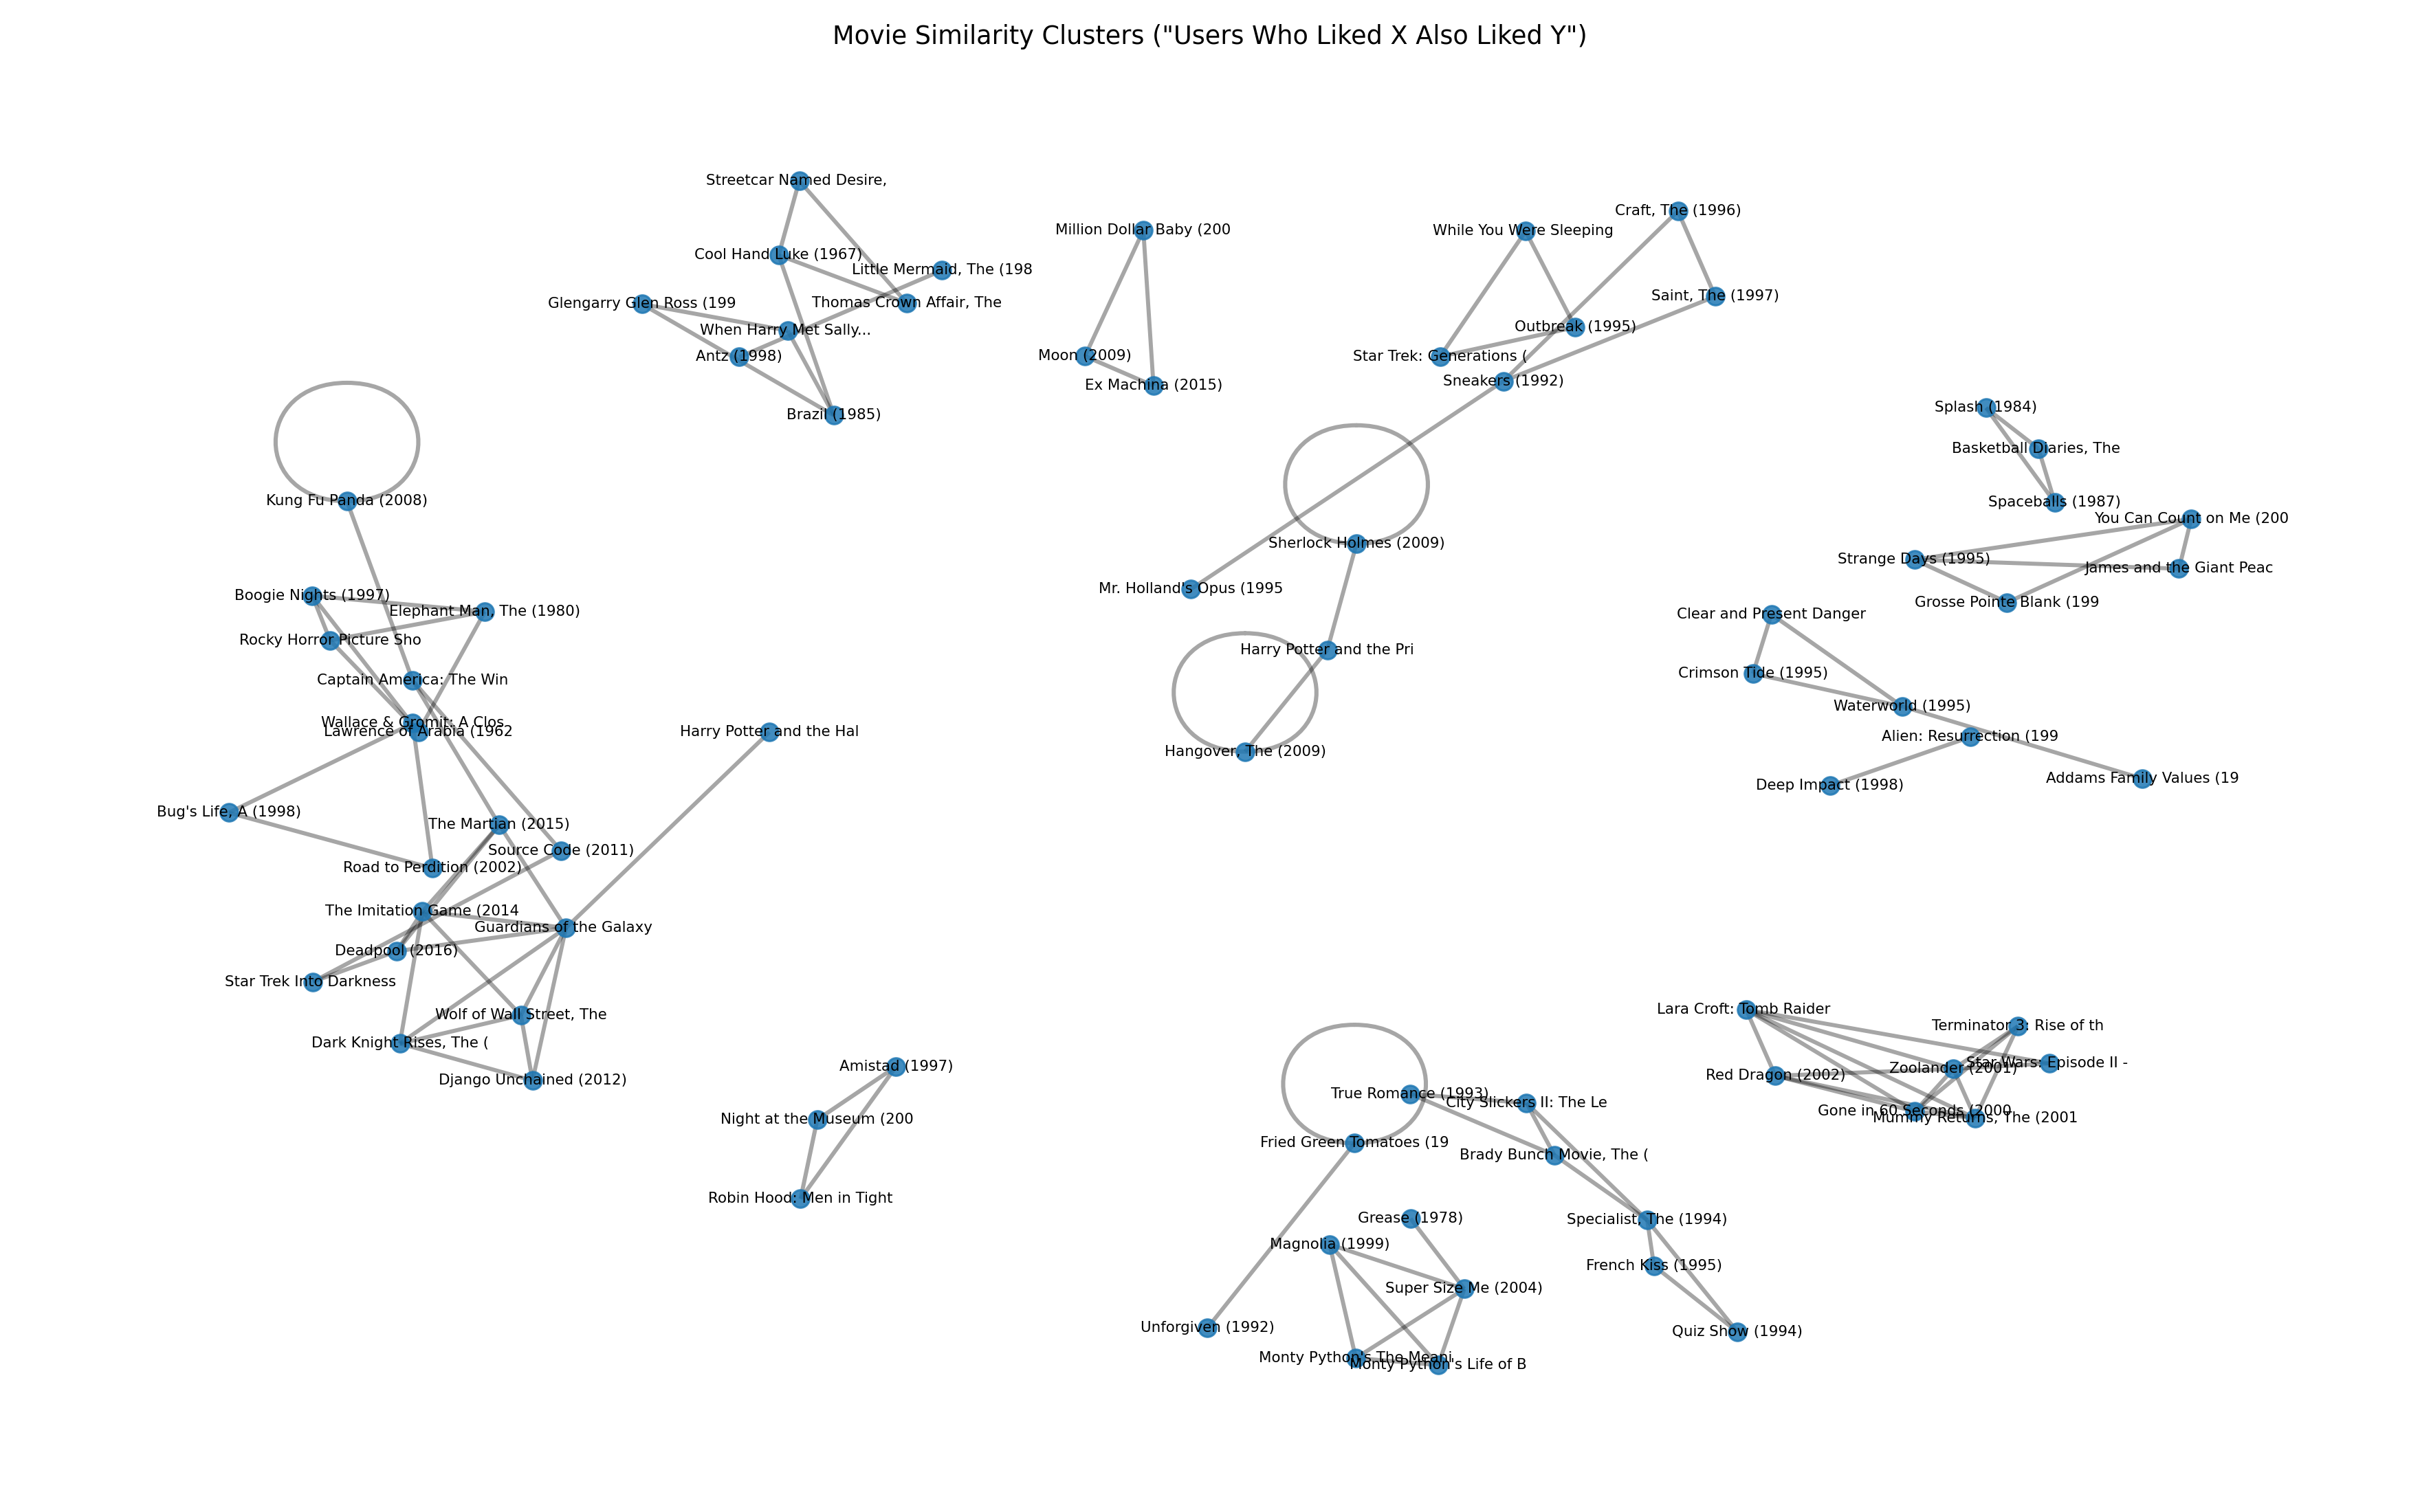

In [4]:
# Movie similarity network (static)
if (MODELS / 'journey_edges.csv').exists():
    from src.visualization.static_plots import plot_similarity_network_matplotlib
    edges = pd.read_csv(MODELS / 'journey_edges.csv')
    out   = ROOT / 'outputs' / 'figures' / 'similarity_network_nb.png'
    out.parent.mkdir(parents=True, exist_ok=True)
    plot_similarity_network_matplotlib(edges, movies, out, max_nodes=80)
    from IPython.display import Image
    display(Image(str(out)))
else:
    print('journey_edges.csv not found — run the pipeline first.')